In [3]:
from graphviz import Graph
from enum import Enum

In [10]:
def build_graph():
    g = Graph()
    node_id = 0

    def build_edge_with_id(x):
        nonlocal node_id
        if x.left is not None and x.left != RBTree.nil:
            if x.left.color == Color.Black:
                g.node(str(id(x.left)), label=str(x.left.key), style='filled', fillcolor='black', fontcolor='white')
            else:
                g.node(str(id(x.left)), label=str(x.left.key), style='filled', fillcolor='red', fontcolor='white')
            g.edge(str(id(x)), str(id(x.left)), color='black')
        else:
            node_id += 1
            g.node(str(node_id), label='nil', style='filled', fillcolor='black', fontcolor='white')
            g.edge(str(id(x)), str(node_id), color='black')
        if x.right is not None and x.right != RBTree.nil:
            if x.right.color == Color.Black:
                g.node(str(id(x.right)), label=str(x.right.key), style='filled', fillcolor='black', fontcolor='white')
            else:
                g.node(str(id(x.right)), label=str(x.right.key), style='filled', fillcolor='red', fontcolor='white')
            g.edge(str(id(x)), str(id(x.right)), color='black')
        else:
            node_id += 1
            g.node(str(node_id), label='nil', style='filled', fillcolor='black', fontcolor='white')
            g.edge(str(id(x)), str(node_id), color='black')
    return g, build_edge_with_id


def render_tree(t):
    graph, b = build_graph()
    graph.node(str(id(t.root)), label=str(t.root.key), style='filled', fillcolor='black', fontcolor='white')
    t.traverse(b)
    return graph

In [5]:
class Color(Enum):
    Red = 0
    Black = 1

class RBNode:
    def __init__(self, key=0, color=Color.Red):
        self.p = None
        self.children = {}     # 0: left child 1 right child
        self.color = color
        self.key = key

    @property
    def left(self):
        return self.children.get(0, None)

    @left.setter
    def left(self, value):
        self.children[0] = value

    @property
    def right(self):
        return self.children.get(1, None)

    @right.setter
    def right(self, value):
        self.children[1] = value


class RBTree:
    nil = RBNode(key=-1, color=Color.Black)
    # nil.left = nil
    # nil.right = nil

    def __init__(self, root=nil):
        self.root = root

    @classmethod
    def __traverse(cls, x: RBNode, func):
        if x != RBTree.nil and x is not None:
            cls.__traverse(x.left, func)
            func(x)
            cls.__traverse(x.right, func)

    def __left_rotate(self, x: RBNode):
        y = x.right
        x.right = y.left
        if y.left != RBTree.nil and y.left is not None:
            y.left.p = x
        y.p = x.p
        if x.p == RBTree.nil or x.p is None:
            self.root = y
        elif x == x.p.left:
            x.p.left = y
        else:
            x.p.right = y
        y.left = x
        x.p = y

    def __right_rotate(self, y: RBNode):
        x = y.left
        y.left = x.right
        if x.right != RBTree.nil and x.right is not None:
            x.right.p = y
        x.p = y.p
        if y.p == RBTree.nil or y.p is None:
            self.root = x
        elif y == y.p.right:
            y.p.right = x
        else:
            y.p.left = x
        x.right = y
        y.p = x

    def __insert(self, z: RBNode):
        y = RBTree.nil
        x = self.root
        while x != RBTree.nil and x is not None:
            y = x
            if z.key < x.key:
                x = x.left
            else:
                x = x.right
        z.p = y
        if y == RBTree.nil or y is None:
            self.root = z
        elif z.key < y.key:
            y.left = z
        else:
            y.right = z
        z.left = RBTree.nil
        z.right = RBTree.nil
        self.__fixup_red_red(z)

    def __fixup_red_red(self, z: RBNode):
        while z.p.color == Color.Red:
            if z.p == z.p.p.left:
                y = z.p.p.right
                if y.color == Color.Red:
                    z.p.color = Color.Black
                    y.color = Color.Black
                    z.p.p.color = Color.Red
                    z = z.p.p
                else:
                    if z == z.p.right:
                        z = z.p
                        self.__left_rotate(z)
                    z.p.color = Color.Black
                    z.p.p.color = Color.Red
                    self.__right_rotate(z.p.p)
            else:
                y = z.p.p.left
                if y.color == Color.Red:
                    z.p.color = Color.Black
                    y.color = Color.Black
                    z.p.p.color = Color.Red
                    z = z.p.p
                else:
                    if z == z.p.left:
                        z = z.p
                        self.__right_rotate(z)
                    z.p.color = Color.Black
                    z.p.p.color = Color.Red
                    self.__left_rotate(z.p.p)
        self.root.color = Color.Black

    def insert(self, key: int):
        n = RBNode(key, Color.Red)
        self.__insert(n)

    def delete(self, node):
        pass

    def find(self, key):
        pass

    def traverse(self, *args):
        def print_func(x: RBNode):
            print(f'{x.key} ')
        if len(args) == 0:
            RBTree.__traverse(self.root, print_func)
        else:
            RBTree.__traverse(self.root, args[0])

In [11]:
T = RBTree()
l = [1, 48, 32, 12, 28, 13, 55, 22, 26, 35]
for e in l:
    T.insert(e)
# T.insert(1)
# T.insert(48)
# T.insert(32)
T.traverse()
g = render_tree(T)

1 
12 
13 
22 
26 
28 
32 
35 
48 
55 


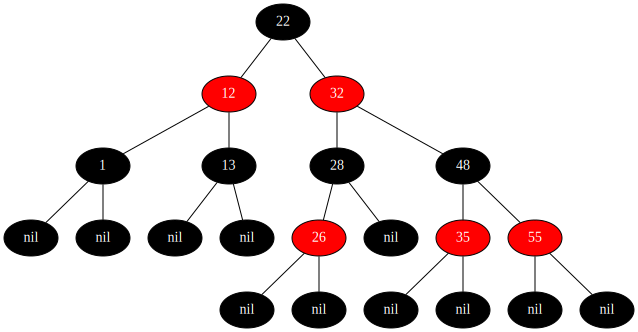

In [12]:
g